# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.weightstats as statsmodel
import numpy as np
np.random.seed(4)

%matplotlib inline

In [1]:
df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [16]:
male_df = df[df.gender == 'M']
female_df = df[df.gender == 'F']

# 1) Is the distribution of body temperatures normal

C:\Users\Ari\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


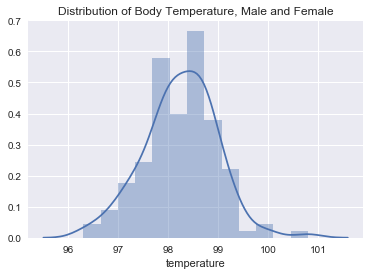

In [8]:
sns.distplot(df.temperature)
plt.title('Distribution of Body Temperature, Male and Female')

In [10]:
stats.mstats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

C:\Users\Ari\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


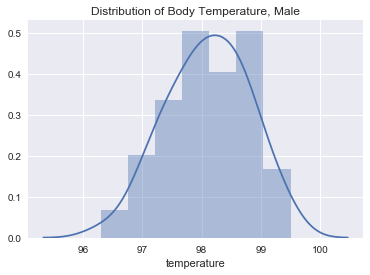

In [14]:
sns.distplot(male_df.temperature)
plt.title('Distribution of Body Temperature, Male')

In [12]:
stats.mstats.normaltest(male_df.temperature)

NormaltestResult(statistic=0.89119996669505031, pvalue=0.64043990745691226)

C:\Users\Ari\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


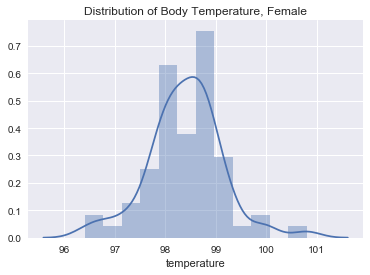

In [17]:
sns.distplot(female_df.temperature)
plt.title('Distribution of Body Temperature, Female')

In [18]:
stats.mstats.normaltest(female_df.temperature)

NormaltestResult(statistic=4.7354381129083993, pvalue=0.093694193898564038)

After viewing the distributions of temperature in the full sample (male/female combined) and then separately for male and female, all distributions appear approximately normal. Using a normal test verifies the visual confirmation and renders non-significant p-values (with alpha = .05).

# 2) Is the sample size large? Are the observations independant?

In [21]:
print(len(df))
df.gender.value_counts()

130


F    65
M    65
Name: gender, dtype: int64

CLT Requires sample size to be large enough our sample satisifes these conditions for both males and females with over 40 observations for each.

Independence of observations is dependent on research design, and I was unable to find a comprehensive description of Carl Reinhold August Wunderlich experiment. This being stated there are several factors that could violate indpendence:

- Measuring temperatures of volunteers at hospital (likely sick so higher temperatures will be obtained)
- Measuring subjects who are currently on medications that could raise/lower temperatures

In order to fully verify independence a comprehensive review of Wunderlich's research methodology should be conducted.

# 3) Is the true population mean really 98.6 degrees F?
- Would you use a one-sample or two-sample test? Why?

The one-sample test is appropriate because we are comparing a sample to the mean. If instead we were determining if two samples were from the same or different populations we would use the two-sample test.

- In this situation, is it appropriate to use the t or z test statistic?

The t-test is appropriate to use because we do not know the standard deviation of the population.

- Now try using the other test. How is the result different? Why?

In [23]:
stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [37]:
statsmodel.ztest(df.temperature, x2 = None, value = 98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

In [33]:
df.temperature.mean()

98.24923076923078

The t-test and z-test yielded signficant results which means that the true population mean of 98.6 degrees F is not supported by this sample.

# 4) At what temperature should we consider someone's temperature to be "abnormal"

A 95% confidence interval based on the collected sample can be used to determine what constitutes a "normal" temperature. Any temperature outside of this interval we could consider "abnormal".

In [53]:
statsmodel._tconfint_generic(df.temperature.mean(), df.temperature.std()/(len(df)**(1/2)), 129, .05, alternative = 'two-sided')

(98.122002905608042, 98.376458632853513)

# 5) Is there a significant difference between males and females in normal temperature?

- What test did you use and why?
- Write a story with your conclusion in the context of the original problem?

The independent t-test in scipy.stats tests if the means of two independent samples are equivalent. We do not need to assume equivalent variance if we use Welch's t-test which is an available option in the scipy.stats package.

In [58]:
stats.ttest_ind(male_df.temperature, female_df.temperature, equal_var = True)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

In [61]:
male_df.temperature.mean()-female_df.temperature.mean()

-0.289230769230727

In Carl Wunderlich's body temperature study the female subjects had a mean body temperature around .3 degrees higher than the male subjects. Using a two-sided t-test this effect was found to be significant with an alpha level of .05, meaning that Wunderlich's study supports the conclusion that females have a higher body temperature than males.